In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
generic_ballot_df = pd.read_csv("538_generic_ballot_averages_2018-2022.csv")
generic_ballot_df.head()

,candidate,pct_estimate,lo,hi,date,election,cycle
0,Democrats,43.94449,39.33347,48.55550,4/15/17,11/6/18,2018
1,Republicans,39.54969,34.93867,44.16071,4/15/17,11/6/18,2018
2,Democrats,43.74965,39.14054,48.35876,4/16/17,11/6/18,2018
3,Republicans,39.59254,34.98343,44.20165,4/16/17,11/6/18,2018
4,Democrats,43.74553,39.13599,48.35508,4/17/17,11/6/18,2018


In [6]:
generic_ballot_df["date"] = pd.to_datetime(generic_ballot_df["date"])

In [9]:
generic_2022 = generic_ballot_df[generic_ballot_df["date"].dt.year == 2022]

In [19]:
generic_2022["week"] = generic_2022["date"].dt.week

<ipython-input-19-83dbc23cf97c>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  generic_2022["week"] = generic_2022["date"].dt.week
<ipython-input-19-83dbc23cf97c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generic_2022["week"] = generic_2022["date"].dt.week


In [25]:
generic_2022 = generic_2022[generic_2022["week"] != 52]

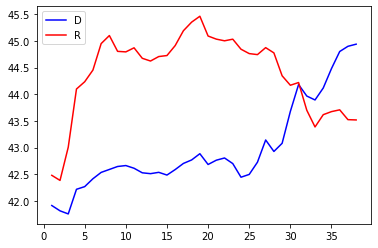

In [34]:
data = generic_2022.groupby(["week", "candidate"])["pct_estimate"].mean().reset_index()

plt.plot("week", "pct_estimate", data=data[data["candidate"] == "Democrats"], label="D", color="blue")
plt.plot("week", "pct_estimate", data=data[data["candidate"] == "Republicans"], label="R", color="red")
plt.legend()
# generic_2022[generic_2022["candidate"] == "Democrats"].groupby("week")["pct_estimate"].mean().reset_index().plot(x="week",y="pct_estimate")
# generic_2022[generic_2022["candidate"] == "Republicans"].groupby("week")["pct_estimate"].mean().reset_index().plot(x="week",y="pct_estimate")
